Ns [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13]


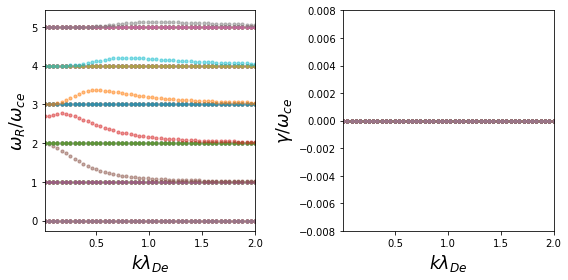

In [2]:
"""
DEMO: Electron Bernstein's modes
"""

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.labelsize'] = 'xx-large'

import sys
sys.path.append('../../')
import xenon

# fundamental parameters
eps0 = 1.
q = 1.
me = 1.
B = 1.

# problem-specific parameters
theta = np.pi / 180. * 90.
wpe_over_wce = 2.5
kB_Te = 1.
vxe = 0.
vze = 0.

qe = -q
wce = qe * B / me
wpe = np.abs(wce) * wpe_over_wce
ne = me * eps0 * wpe**2 / qe**2
pe = ne * kB_Te
pxe = pe  # p_para
pze = pe  # p_perp

# pack parameters for dr solving
species = [
    [qe, me, ne, vxe, vze, pxe, pze],
]
# whether each species is magnetized or not
# if not, the species will be treated like es1d
isMag = [True]

params = dict(
    epsilon0=eps0,
    Bz=B,
)

# normalization for convenience
lamDze = np.sqrt(eps0 * pze / (ne * qe)**2)
k0 = 1 / lamDze
knorm_name = '\lambda_{De}'

wce = qe * B / me
w0 = abs(wce)
wnorm_name = '/\omega_{ce}'

# k-vector
ks = np.linspace(0.01, 2, 50) * k0
kxs = ks * np.sin(theta)
kzs = ks * np.cos(theta)

# dr calcualation parameters
J = 8  # order of Pade approximation
N = 13  # number of bessel function terms to include

# solve for dr
ws_es3d = xenon.vlasov.k2w_es3d(kxs, kzs, species, params, isMag, J=J, N=N)

# plot dr
pargs = dict(
    s=10,
    alpha=0.5,
)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
xenon.common.plot_dr(ks,
                    ws_es3d,
                    wnorm=w0,
                    knorm=k0,
                    wnorm_name=wnorm_name,
                    knorm_name=knorm_name,
                    wrmin=-0.1,
                    wrmax=5.5,
                    ax0=ax0,
                    ax1=ax1,
                    pargs0=pargs,
                    pargs1=pargs)
fig.tight_layout()
plt.show()